# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University

## Assignment \#2

We will begin by unpickling the dataset we had played around with in Lecture 4. But first, we will load most modules we will be using:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

To unpickle just do this:

In [2]:
pickle_file = open('../../lectures/data/campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]

## -=-=-= Exploring hourly and weekly consumption patterns (no seasonality) =-=-=-

# Task \#1 (10%)

Create a new Pandas Data Frame that contains only two columns (Time and Value) and only the rows that belong to the University-wide meter (Electric kW Calculations Main Campus). In other words, get rid of the Point Name column and select only the rows for the campus meter.

In [3]:
# Your code goes here
newData = pd.DataFrame(
    np.array(data[['Time','Value']].ix[data['Point name'] == pointNames[5]]),
    columns=['Time','Value']
)
newData.head()

,Time,Value
0,2013-11-10 00:00:30,8367.82
1,2013-11-10 00:01:30,8287.11
2,2013-11-10 00:02:30,8340.61
3,2013-11-10 00:03:30,8342.06
4,2013-11-10 00:04:30,8341.36


# Task \#2 (10%)

In one figure, plot one histogram showing the average hourly consumption on the entire dataset.
In a separate figure, plot 7 subplots with similar histograms but now showing the average hourly consumption for each day of the week (hence the 7 supplots).

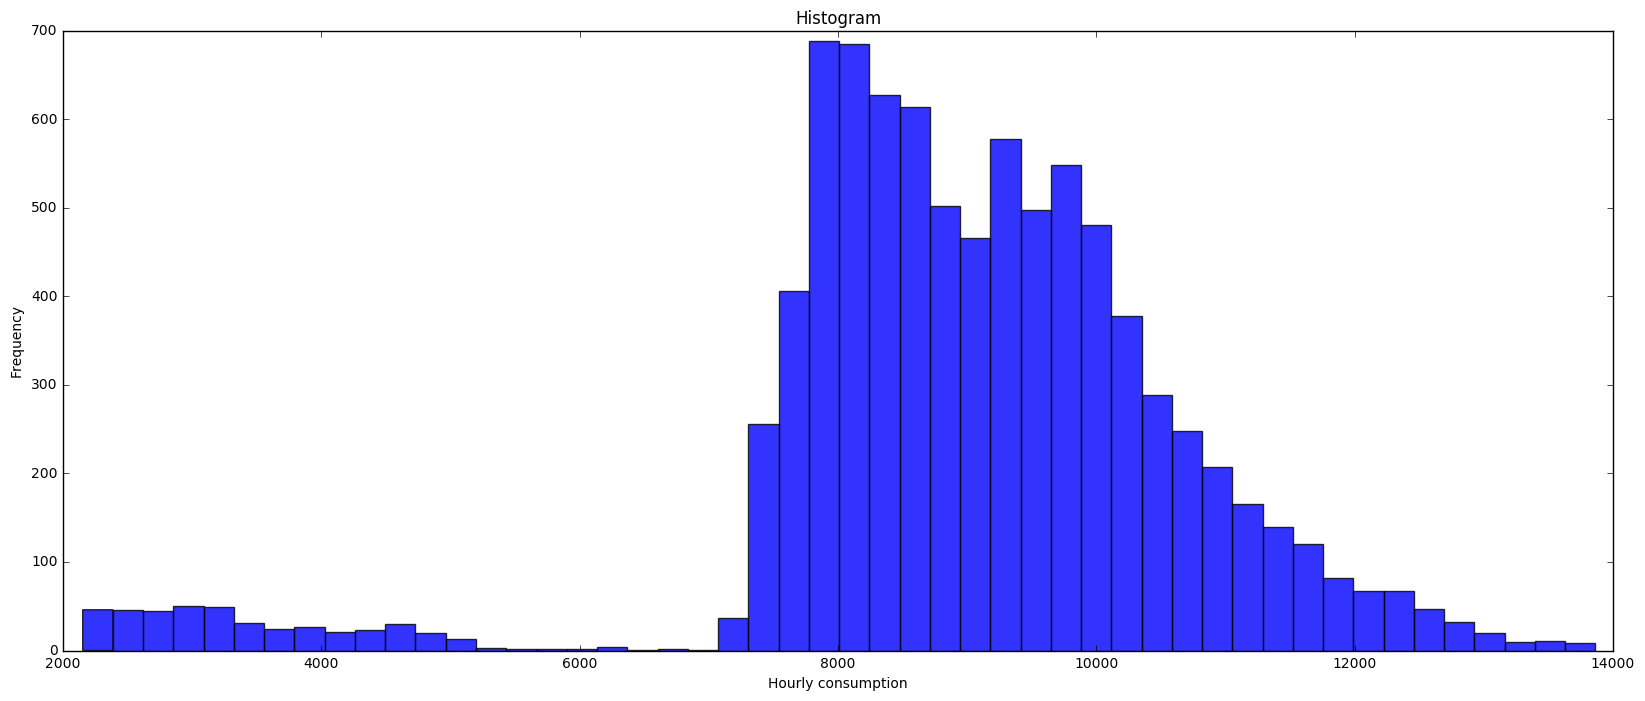

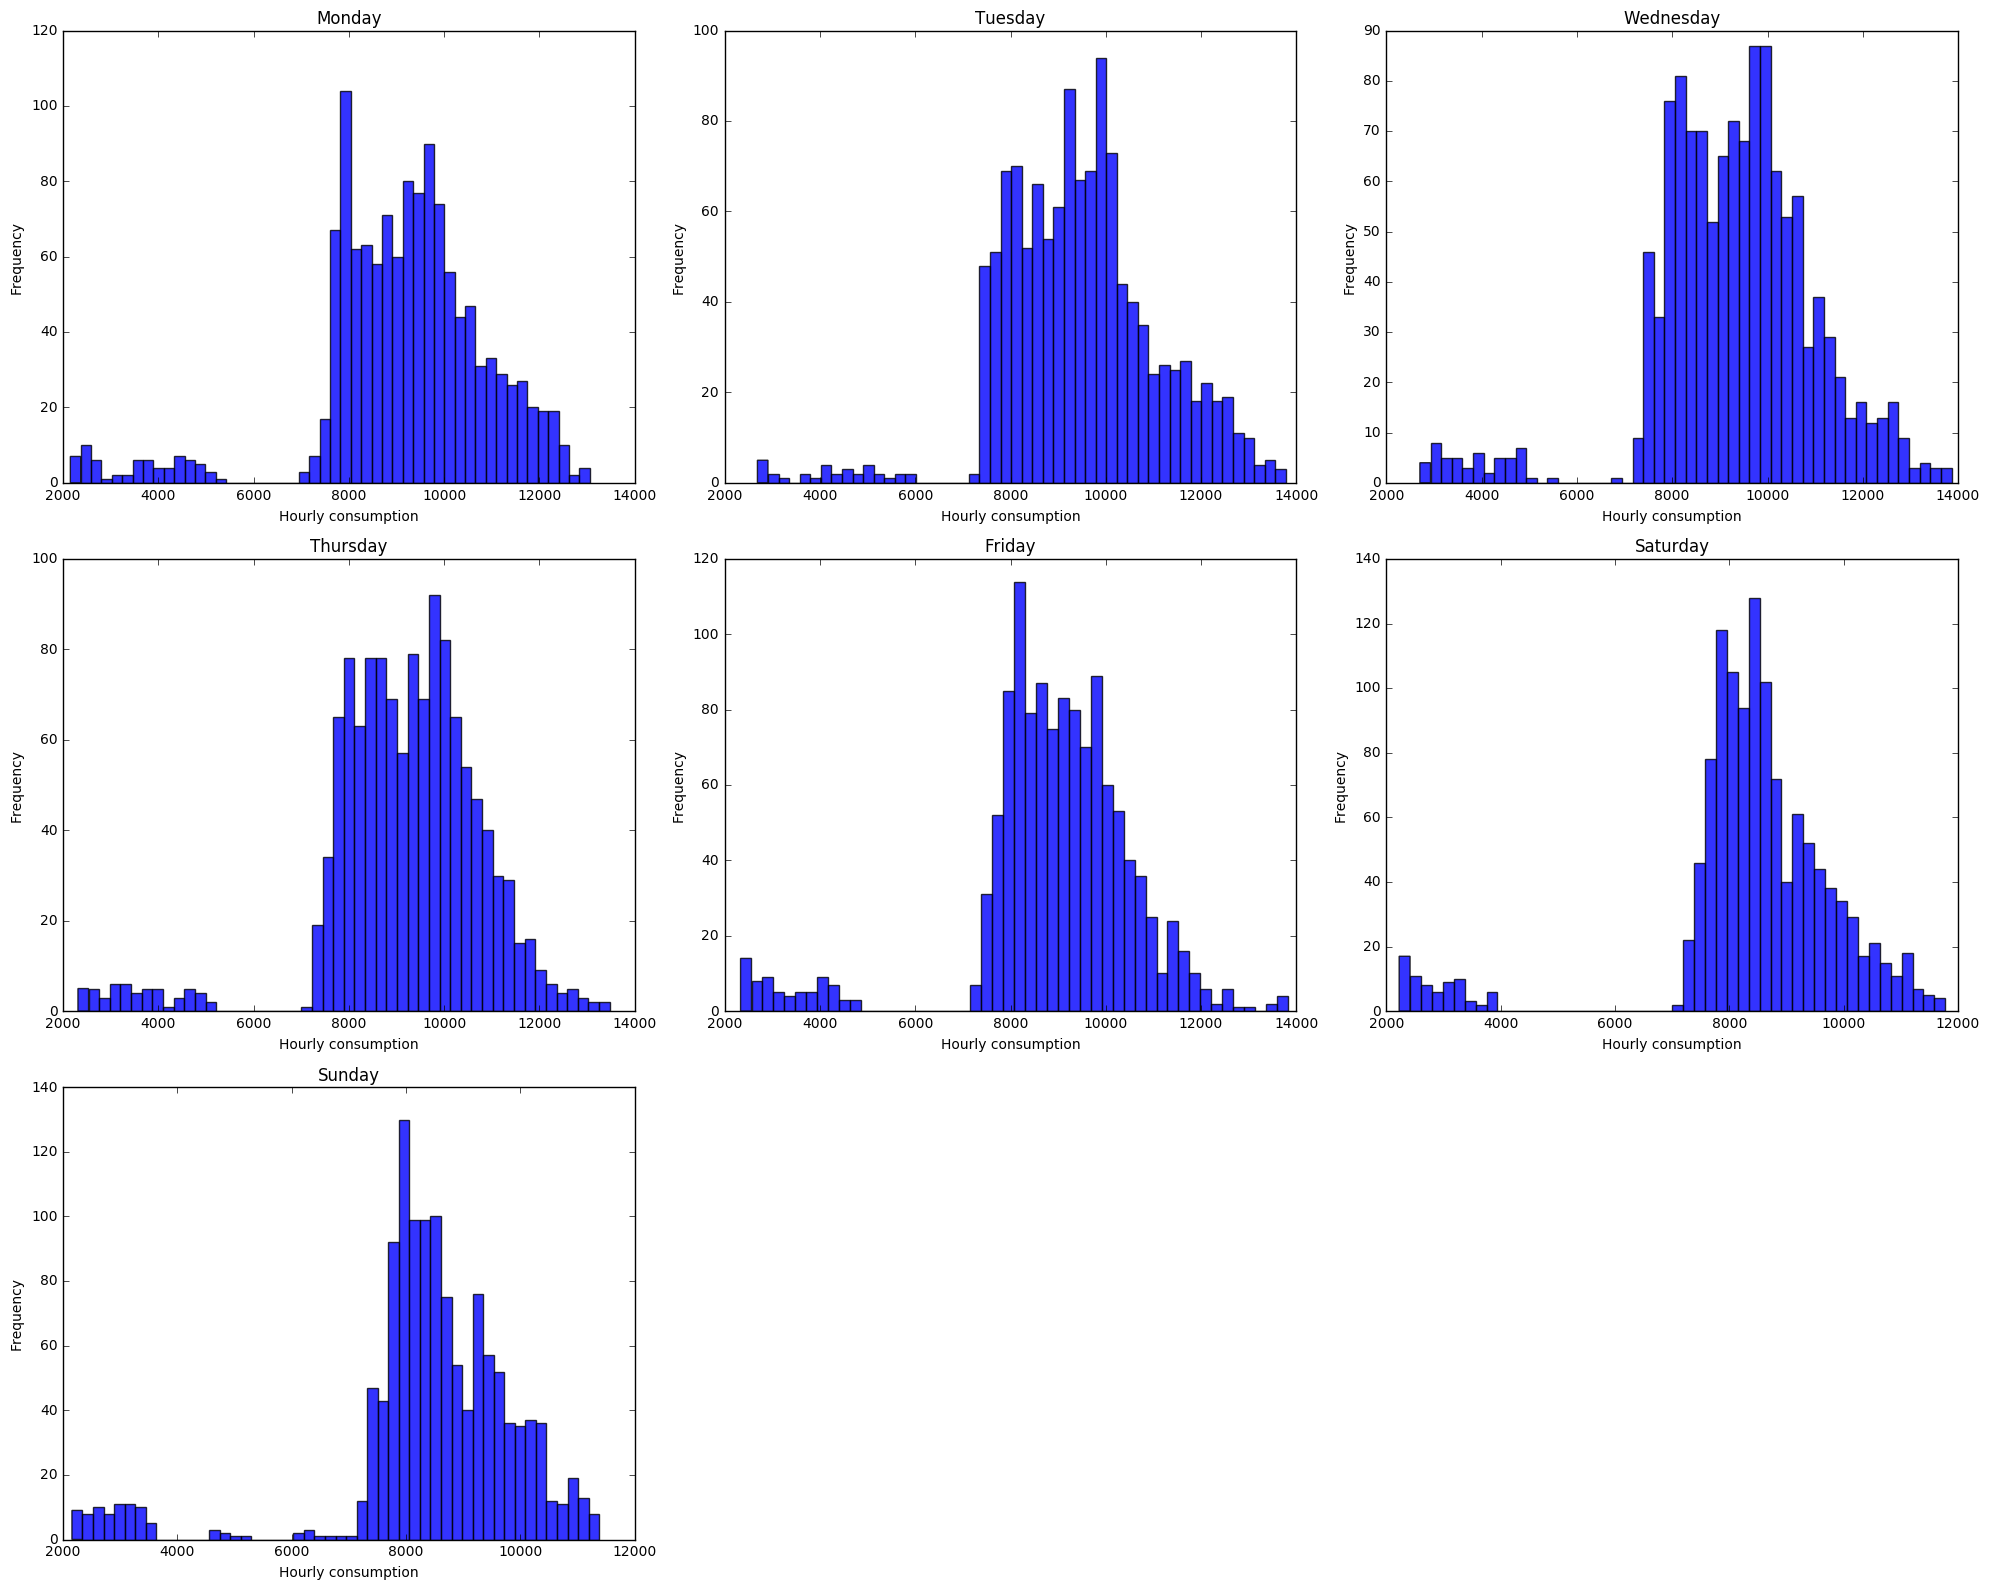

In [14]:
# Your code goes here
days = np.array([x.to_datetime().date() for x in newData['Time']])
hours = np.array([x.to_datetime().hour for x in newData['Time']])
tmp = pd.DataFrame(np.array([hours,days,newData['Value']]).T,columns=['Hour','Day','Value'])
hourly = tmp.groupby(['Hour','Day'])['Value'].apply(lambda x: np.sum(x) / len(x))
fig1 = plt.figure(1,figsize=(20,8))
p = plt.hist(hourly, bins=50, color='blue', alpha=0.8, align='mid')
plt.xlabel('Hourly consumption')
plt.ylabel('Frequency')
plt.title('Histogram')
# #--------------------------------------------------------------------
week_days = np.array([x.to_datetime().weekday() for x in newData['Time']])

Monday = pd.DataFrame(np.array(newData.ix[week_days == 0]),columns=('Time','Value'))
Tuesday = pd.DataFrame(np.array(newData.ix[week_days == 1]),columns=('Time','Value'))
Wednesday = pd.DataFrame(np.array(newData.ix[week_days == 2]),columns=('Time','Value'))
Thursday = pd.DataFrame(np.array(newData.ix[week_days == 3]),columns=('Time','Value'))
Friday = pd.DataFrame(np.array(newData.ix[week_days == 4]),columns=('Time','Value'))
Saturday = pd.DataFrame(np.array(newData.ix[week_days == 5]),columns=('Time','Value'))
Sunday = pd.DataFrame(np.array(newData.ix[week_days == 6]),columns=('Time','Value'))

wAll = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = plt.figure(2,figsize=(20,16))
for j in range(7):
    plt.subplot(3,3,j+1)
    dayW = np.array([x.to_datetime().date() for x in wAll[j]['Time']])
    hourW = np.array([x.to_datetime().hour for x in wAll[j]['Time']])
    tmp = pd.DataFrame(np.array([dayW,hourW,wAll[j]['Value']]).T,columns=['Hour','Day','Value'])
    hourlyW = tmp.groupby(['Hour','Day'])['Value'].apply(lambda x: np.sum(x) / len(x))
    pl = plt.hist(hourlyW, bins=50, color='blue', alpha=0.8, align='mid')
    plt.xlabel('Hourly consumption')
    plt.ylabel('Frequency')
    plt.title(Days[j])
fig.tight_layout()
plt.show()

# Task \#3 (10%)

In one figure, create a box plot of the average hourly electricity consumption for each hour of the day (i.e., your plot will show 24 *boxes*, one for each hour of the day, and each *box* will represent the distribution of the average hourly consumption in the dataset for that hour).

In another figure, create 7 subplots showing the same box plots as above, but now for each of the seven days of the week.

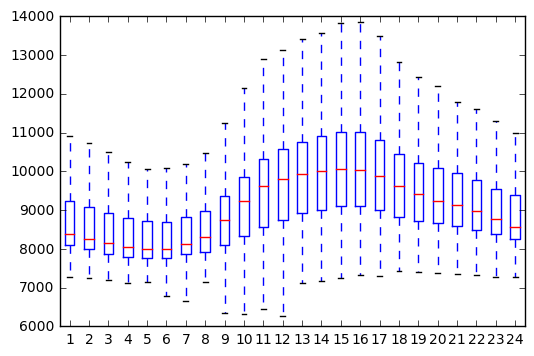

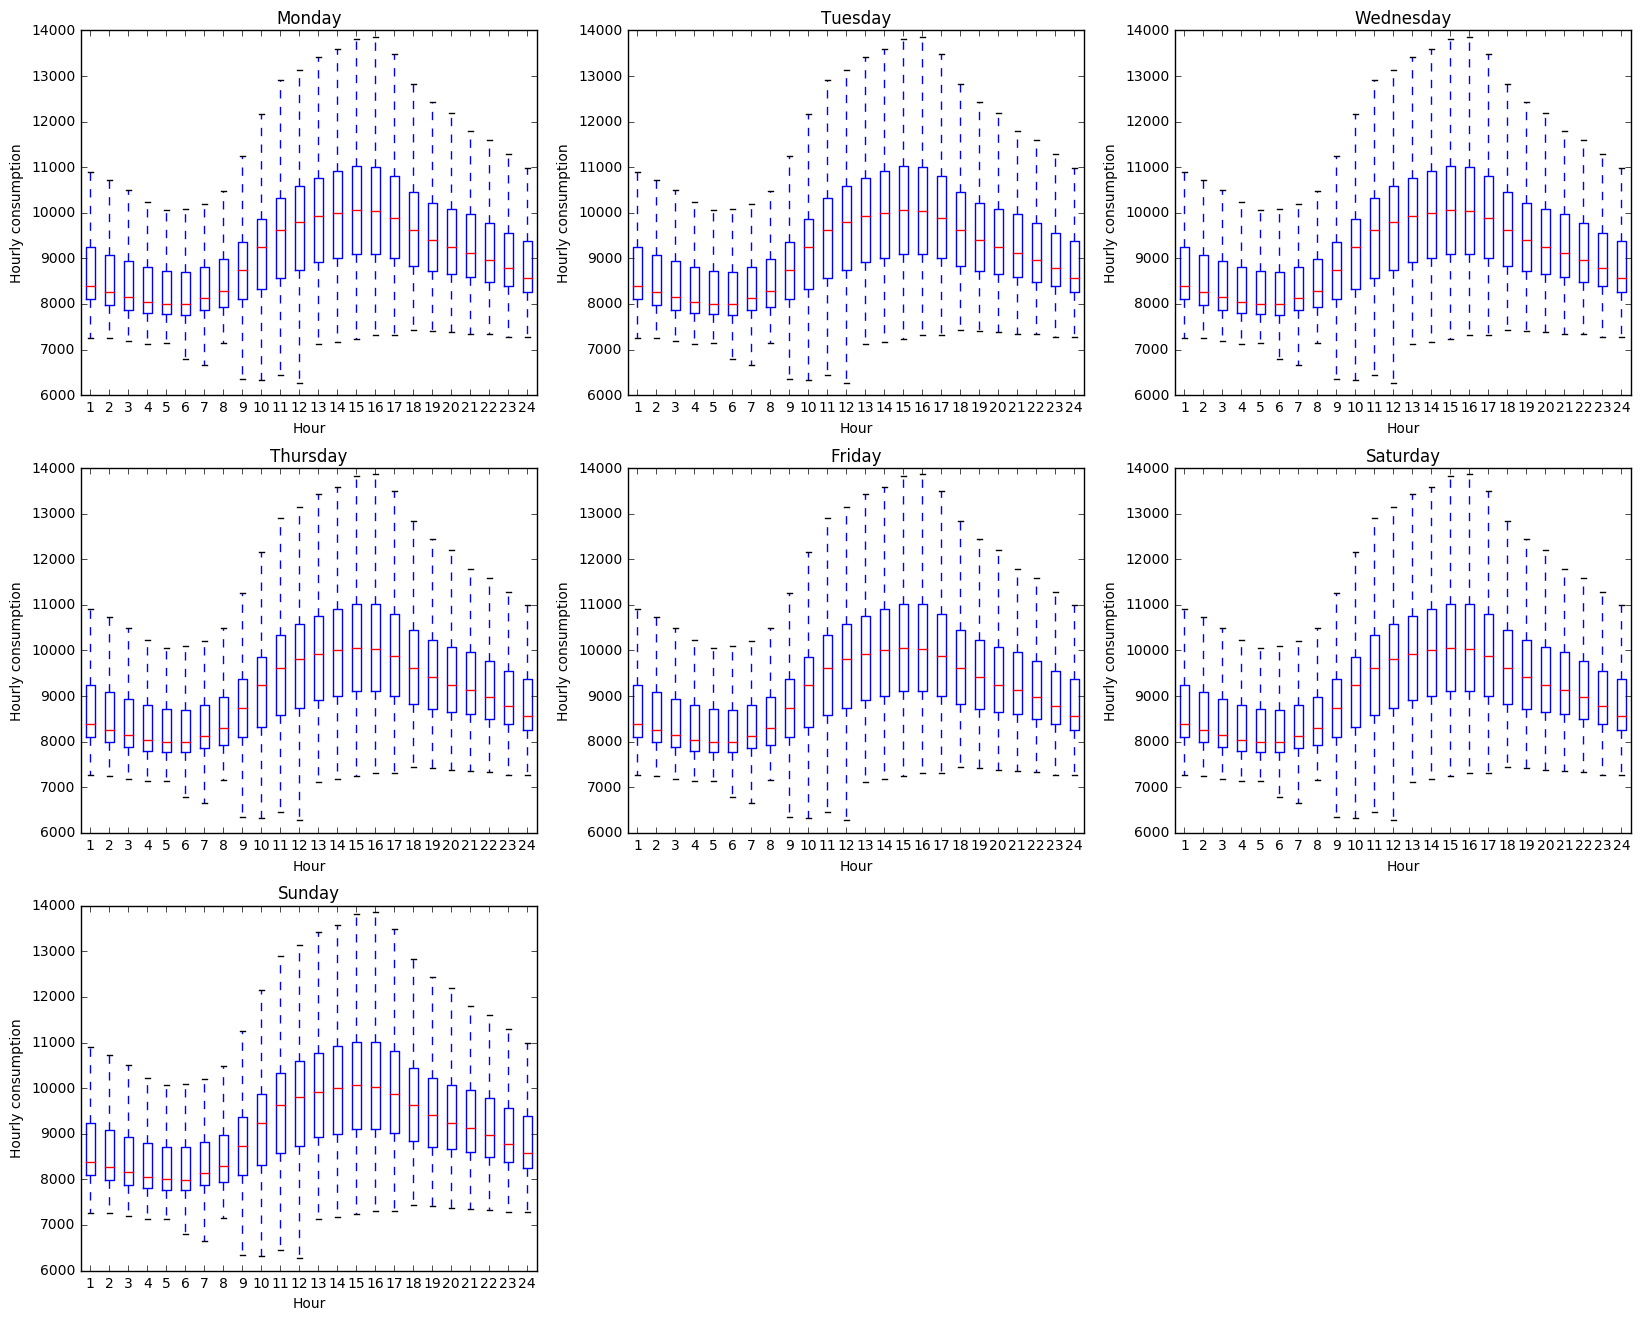

In [15]:
# Your code goes here
hourlyUnstarked = np.array(hourly.unstack(level=1))
logicalHourly = []
# Delete Nan
for i in hourlyUnstarked:
    i = i[np.logical_not(np.isnan(i))]
    logicalHourly.append(i)
fig1 = plt.figure(1)
f = plt.boxplot(logicalHourly,0,'')
#--------------------------------------------------------------------
fig2 = plt.figure(2,figsize=(20,16))
for j in range(7):
    plt.subplot(3,3,j+1)
    hourW = np.array([x.to_datetime().hour for x in wAll[j]['Time']])
    dayW = np.array([x.to_datetime().date() for x in wAll[j]['Time']])
    tmp = pd.DataFrame(np.array([hourW,dayW,wAll[j]['Value']]).T,columns=['Hour','Day','Value'])
    hourlyW = tmp.groupby(['Hour','Day'])['Value'].apply(lambda x: np.sum(x) / len(x))
    hourlyWUnstarked = np.array(hourly.unstack(level=1))
    consumption = []
# Delete Nan
    for i in hourlyWUnstarked:
        i = i[np.logical_not(np.isnan(i))]
        consumption.append(i)
    pl = plt.boxplot(consumption,0,'')
    plt.xlabel('Hour')
    plt.ylabel('Hourly consumption')
    plt.title(Days[j])
fig.tight_layout()
plt.show()


## -=-=-= Exploring seasonal effects =-=-=-

# Task \#4 (10%)

Create a **stem plot** of the average daily electricity consumption for the whole dataset (i.e., the plot should have ~365 stems):

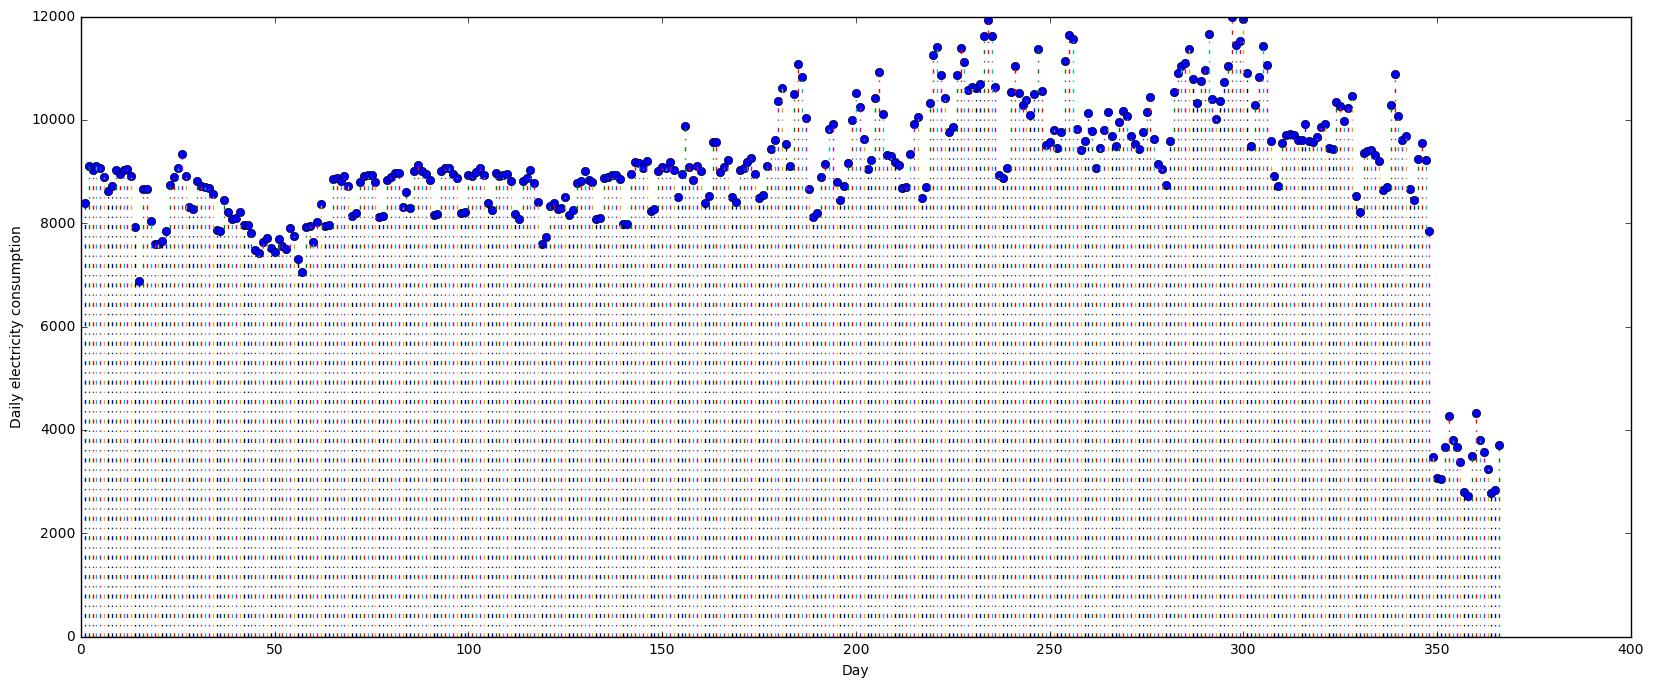

In [16]:
# Your code goes here
days = np.array([x.to_datetime().date() for x in newData['Time']])
tmp = pd.DataFrame(np.array([days,newData['Value']]).T,columns=['Day','Value'])
c = tmp.groupby('Day')['Value'].apply(lambda x: np.sum(x) / len(x))
x = np.linspace(1,366,366)
fig = plt.figure(figsize=(20,8))
plt.stem(x, daily, '-.')
plt.xlabel('Day')
plt.ylabel('Daily electricity consumption')
plt.show()

# Task #5 (10%)

What are your findings so far? Please elaborate on how the above plots and analysis have informed you about the data. 


*Your answer goes here...*

In [23]:
daily

Day
2013-11-10     8393.388868
2013-11-11     9099.672082
2013-11-12     9022.590643
2013-11-13     9110.351568
2013-11-14     9062.693597
2013-11-15     8891.615189
2013-11-16     8620.645746
2013-11-17     8715.570087
2013-11-18     9021.979361
2013-11-19     8960.624445
2013-11-20     9033.613166
2013-11-21     9057.755833
2013-11-22     8906.223629
2013-11-23     7921.556725
2013-11-24     6877.864179
2013-11-25     8663.806793
2013-11-26     8658.043231
2013-11-27     8036.916502
2013-11-28     7599.415595
2013-11-29     7602.389087
2013-11-30     7651.476502
2013-12-01     7848.796281
2013-12-02     8732.960421
2013-12-03     8893.499739
2013-12-04     9062.169838
2013-12-05     9344.179116
2013-12-06     8918.756250
2013-12-07     8316.967794
2013-12-08     8273.054320
2013-12-09     8824.958507
                  ...     
2014-10-12     8693.507560
2014-10-13    10287.732849
2014-10-14    10881.671966
2014-10-15    10070.323169
2014-10-16     9601.404339
2014-10-17     9684.1750

# Task \#6 (10%)

Create a new DataFrame called ```loadCurves```, which contains 24 columns (one for each hour of the day) and each of those columns has a Series with as many rows as there are days in our dataset. Each column wil be composed of the average power consumed during that particular hour for each day of the year.

Note: You may benefit from knowing about the ```groupby``` and ```unstack``` methods for DataFrames.

In [25]:
# Your code goes here...
tmp = pd.DataFrame(np.array([hours,days,newData['Value']]).T,columns=['Hour','Day','Value'])
tmpMean = tmp.groupby(['Day','Hour'])['Value'].apply(lambda x: np.sum(x) / len(x))
loadCurves = tmpMean.unstack(level=1)
loadCurves.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
2013-11-10,8261.731944,8131.553229,7985.570644,7912.394148,7857.923992,7862.010058,7885.617094,7856.087542,7878.690183,8049.828625,...,8771.265092,8840.671298,8841.125129,8973.462544,8899.309123,8859.551002,8837.606698,8780.544769,8647.659969,8386.710027
2013-11-11,8197.355862,8054.626069,7868.638944,7771.354406,7811.224690,7866.789740,8100.972517,8295.874919,8757.027031,9252.911467,...,10316.701271,10385.125150,10285.286000,9856.362792,9822.040604,9523.404717,9336.900454,9145.744081,8882.389113,8603.991221
2013-11-12,8266.870269,8145.089365,7946.754327,7840.498615,7842.833160,7866.686498,8138.263460,8286.819533,8759.412804,9246.517062,...,10059.032833,10031.943512,9961.895871,9937.420021,9566.255748,9336.759300,9217.157573,9135.900333,8857.380377,8591.176633
2013-11-13,8433.263460,8275.495327,8090.760162,8002.365660,7949.081529,7934.077544,8147.288067,8307.100948,8751.405846,9371.957619,...,10122.531558,10115.408479,10071.436379,9994.061208,9746.636367,9512.415563,9298.231329,9181.525150,8829.826569,8519.899406
2013-11-14,8345.743496,8170.467133,7990.828448,7943.760960,7852.243654,7877.263787,8096.056890,8247.871173,8727.444219,9350.668415,...,10374.962687,10359.396142,10169.311487,9886.472496,9716.298571,9418.414556,9051.457006,8960.413940,8700.717290,8447.538688


# Task \#7 (10%)
Create a heatmap of the daily load curves for campus, similar to those shown in Paper \#1. In particular, this heatmap will be a 2D map with the horizontal axis showing the hours of the day (24 in total), and the vertical axis showing the day of the year (~365 total). Then each cell will be color-coded with the value corresponding to the average power consumed during this hour. 

Try different colormaps to see which one works best for you.

Note: you may need to normalize the data to see differences. 

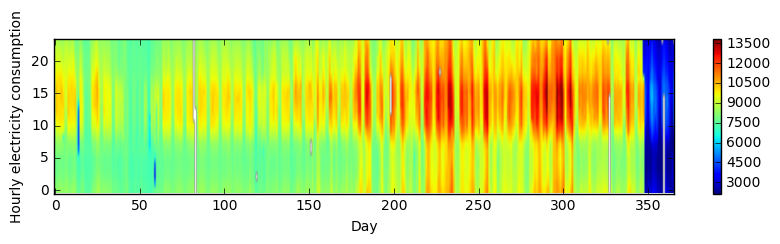

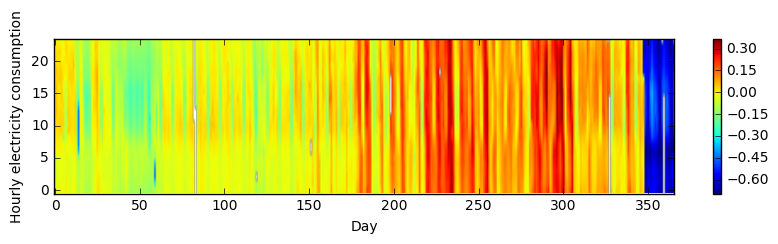

In [18]:
# Your code goes here...
fig = plt.figure(1)
fig.set_size_inches(10,2)
heatmap = plt.imshow(loadCurves.T,origin='lower',aspect='auto')
plt.colorbar(heatmap)
plt.xlabel('Day')
plt.ylabel('Hourly electricity consumption')
plt.show()
# normalize
normloadCurves = loadCurves.apply(lambda x: (x - np.mean(x)) / (np.max(x)-np.min(x)))
fig = plt.figure(2)
fig.set_size_inches(10,2)
heatmap = plt.imshow(normloadCurves.T,origin='lower',aspect='auto')
plt.colorbar(heatmap)
plt.xlabel('Day')
plt.ylabel('Hourly electricity consumption')
plt.show()


# Task \#8 (20%)

Let's see if we can find some patterns in these load curves. Using your favorite implementation and flavor of the k-means algorithm, play around with clustering the daily loadCurves to see if we can find 2 or 3 clusters that would best differentiate between weekdays and weekends. In other words, perform k-means (or k-medioids, or whatever) on the dataset with $k \in \{2, 3\}$ and the dataset being 365 samples of 24-dimensional vectors.

Note: you will only check the weekend vs. weekday labels **after** clustering (i.e., do not use this attribute for clustering, but rather only the 24 average hourly consumption values).

In [19]:
# Your code goes here...
# Using sklearn
from sklearn.cluster import KMeans
# Fill NAN with 0.
loadCurves = loadCurves.fillna(0)
kmeans = KMeans(n_clusters=3).fit(loadCurves)
skClusters = []
skClusters.append(loadCurves.iloc[np.where(kmeans.labels_ == 0)])
skClusters.append(loadCurves.iloc[np.where(kmeans.labels_ == 1)])
skClusters.append(loadCurves.iloc[np.where(kmeans.labels_ == 2)])
print(kmeans.labels_)
print(kmeans.cluster_centers_)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0
 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 0 2 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0
 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 1 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 2 2 2 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  9721.79994288   9579.4616577    9450.32673785   9358.51387189
    9305.20090798   9284.51526315   9353.62700053   9523.71682609
    9990.79410395  10520.98484331  10975.59721732  11270.22596686
   11429.08600074  11562.99080102  11644.97436924  11644.86

12
DatetimeIndex(['2014-04-14', '2014-04-21', '2014-04-22', '2014-05-07',
               '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13',
               '2014-05-14', '2014-05-15',
               ...
               '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02',
               '2014-10-13', '2014-10-14', '2014-10-15', '2014-10-16',
               '2014-10-17', '2014-10-21'],
              dtype='datetime64[ns]', length=118, freq=None)
DatetimeIndex(['2014-01-31', '2014-02-01', '2014-10-03', '2014-10-24',
               '2014-10-25', '2014-10-26', '2014-10-27', '2014-10-28',
               '2014-10-29', '2014-10-30', '2014-10-31', '2014-11-01',
               '2014-11-02', '2014-11-03', '2014-11-04', '2014-11-05',
               '2014-11-06', '2014-11-07', '2014-11-08', '2014-11-09',
               '2014-11-10'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2013-11-10', '2013-11-11', '2013-11-12', '2013-11-13',
               '2013-11-14', '2013-11-15'

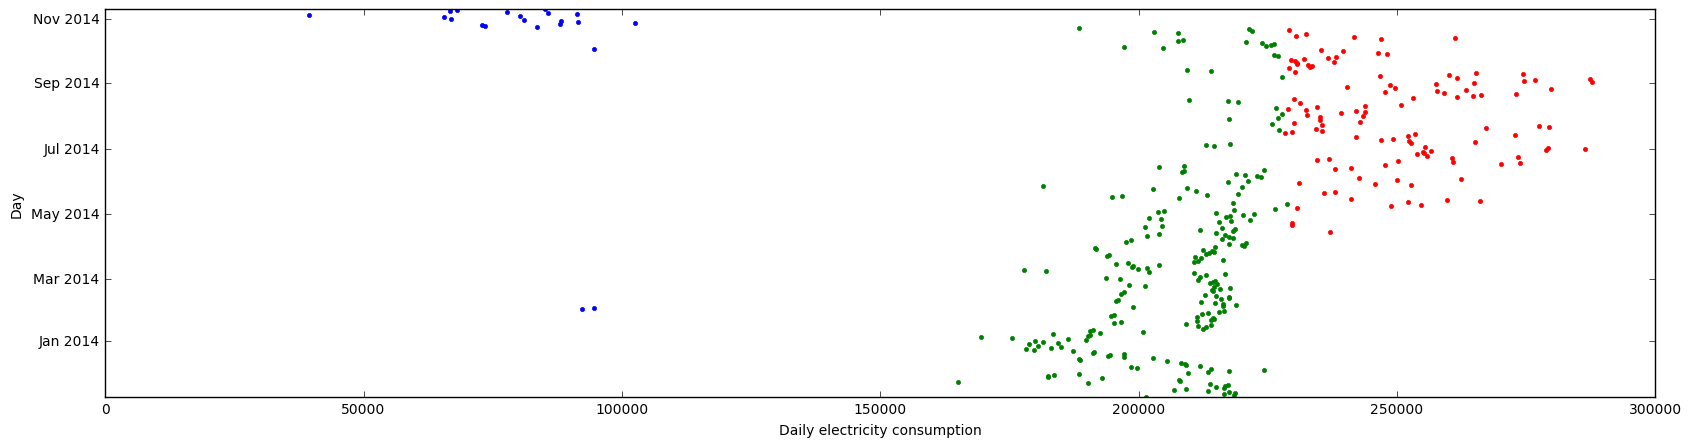

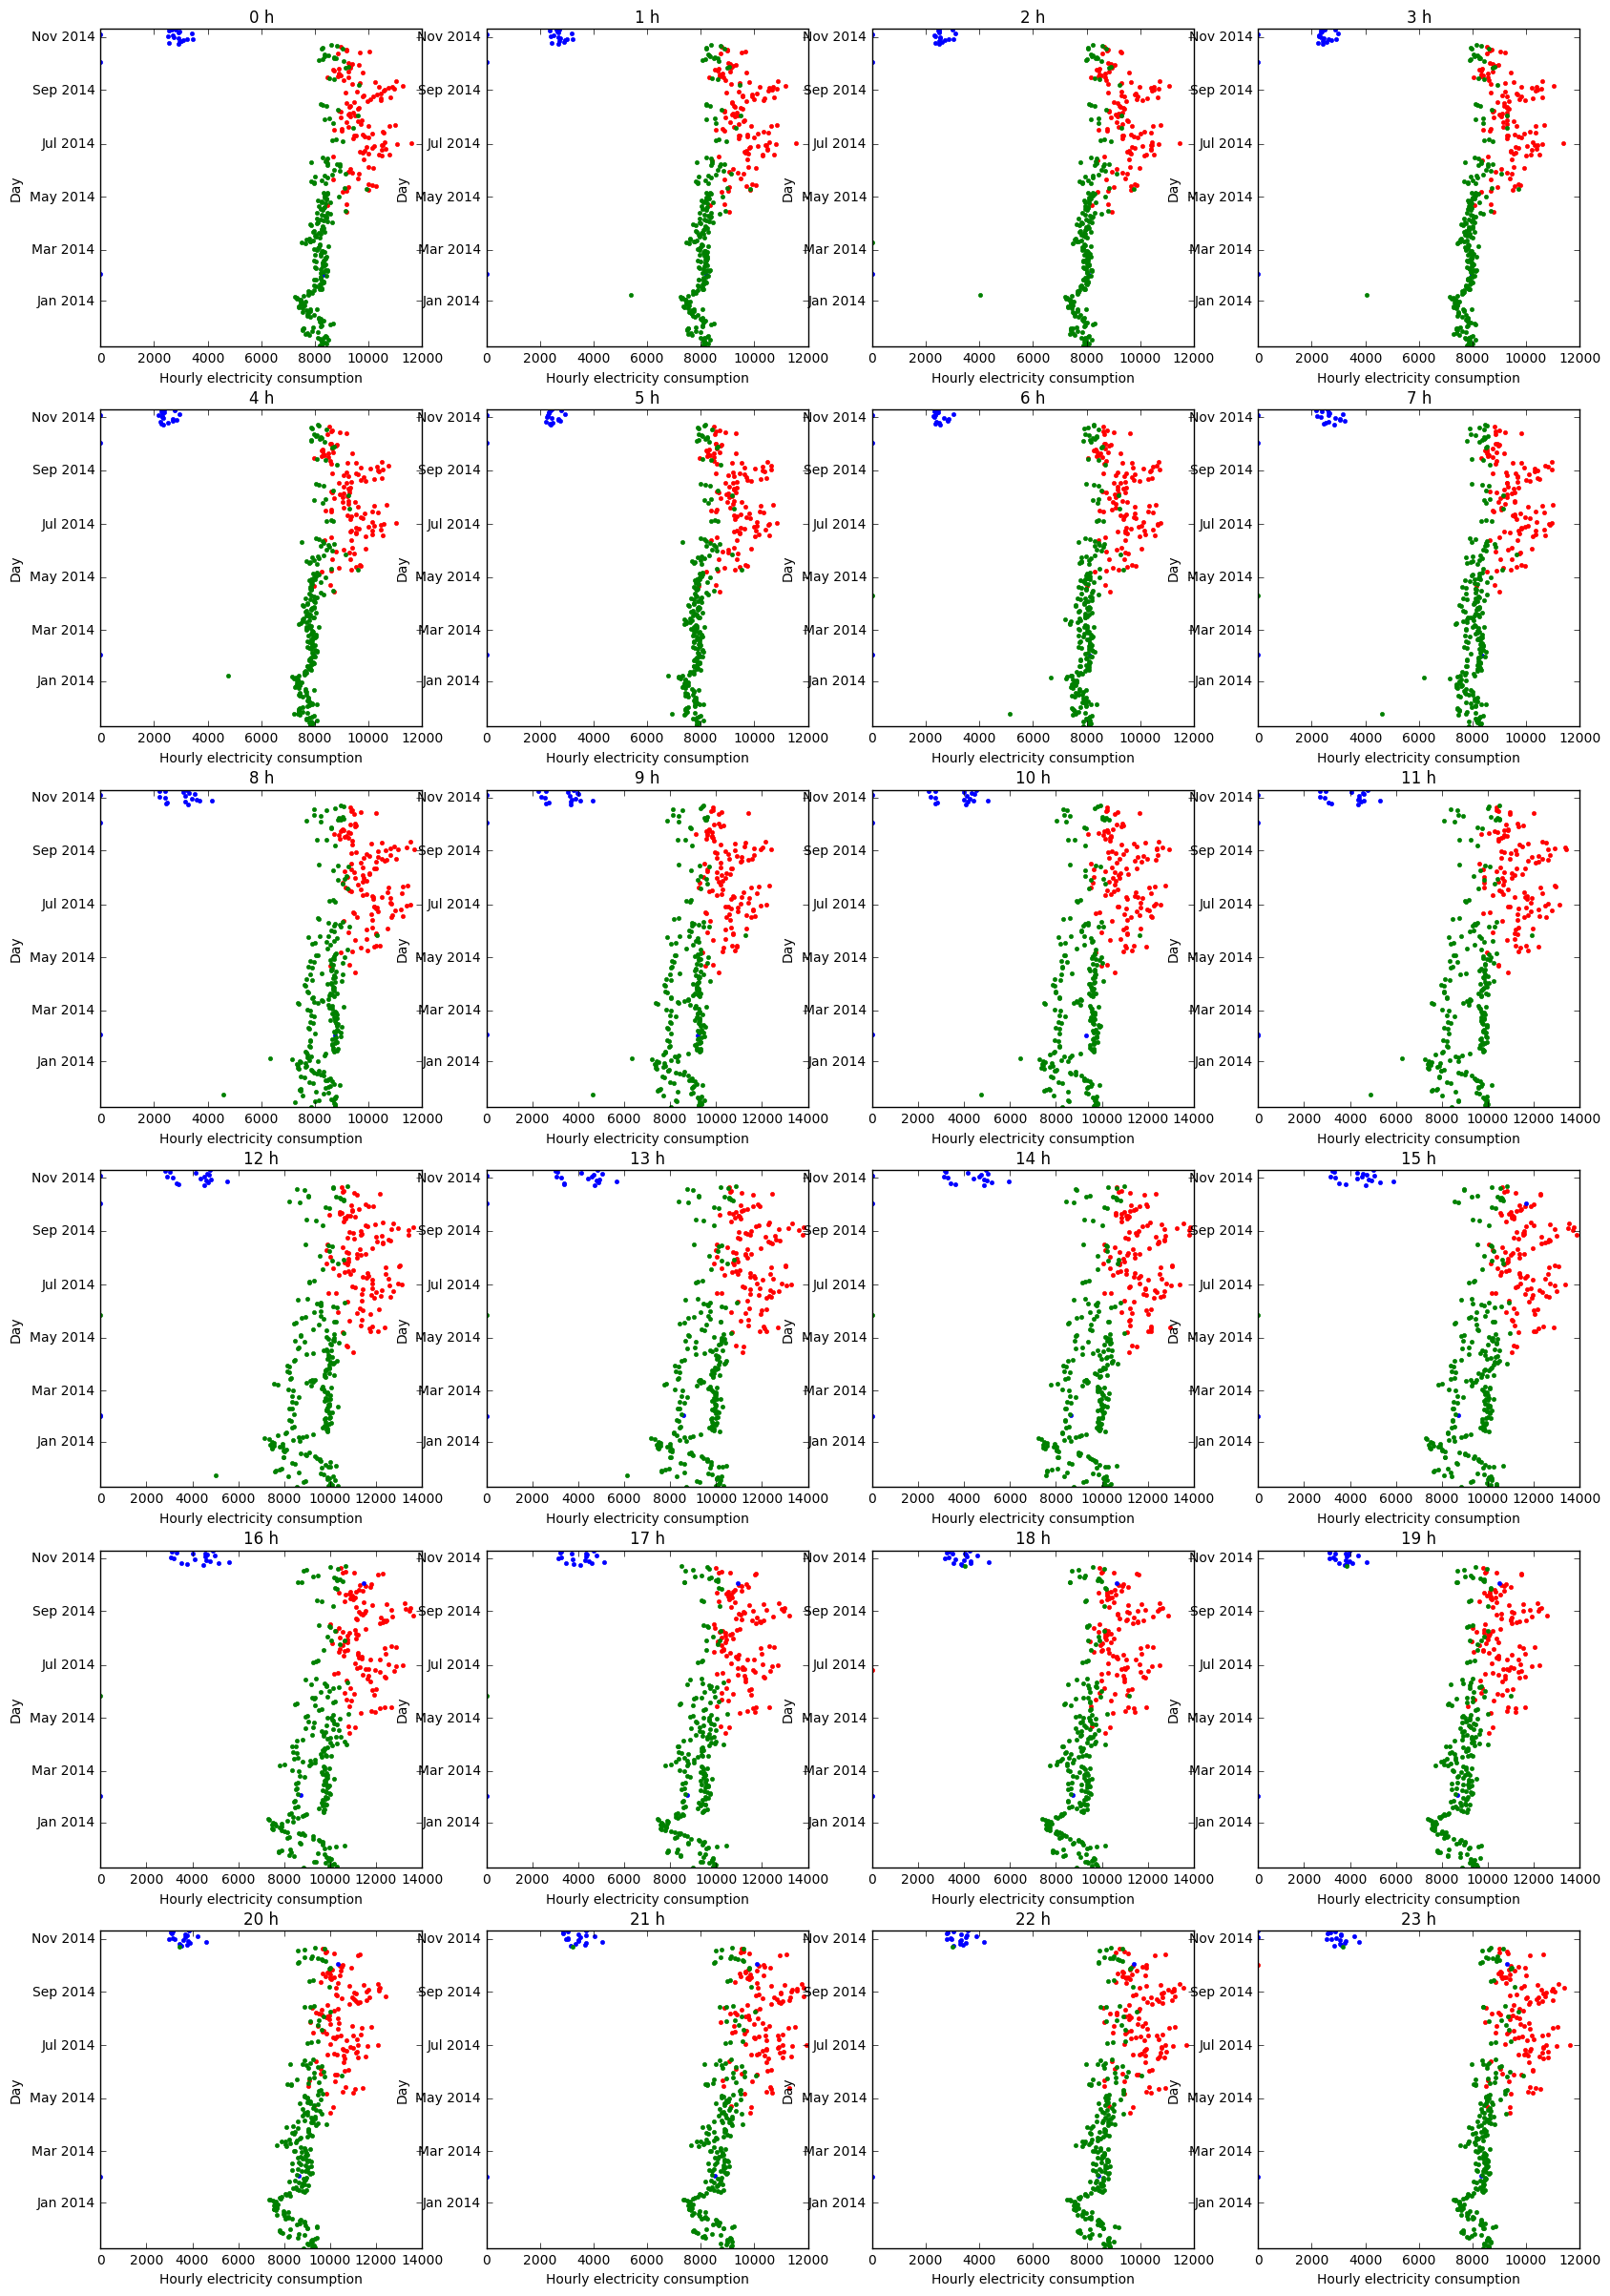

In [20]:
# Develope Clustering function by myself
#Clustering
def clustering(X, mu):
    clusters  = {}
    for j in range(len(X)):
        bestmukey = min([(i[0], np.linalg.norm(loadCurves.iloc[j]-mu[i[0]])) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(loadCurves.iloc[j])
        except KeyError:
            clusters[bestmukey] = [loadCurves.iloc[j]]
    return clusters

# Re-evaluate
def findCenters(clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

# Fill NAN with 0.
loadCurves = loadCurves.fillna(0)

# 3 clusters
k = 3
oldmu = []
mu = []

iteration = 0
for i in range(k):
    oldmu.append(loadCurves.iloc[round(len(loadCurves)*np.random.random_sample())])
    mu.append(loadCurves.iloc[round(len(loadCurves)*np.random.random_sample())])
# Converged or not
while np.any([abs(mu[i]-oldmu[i]) > 1 for i in range(k)]):
    oldmu = mu
    clusters = clustering(loadCurves, mu)
    mu = findCenters(clusters)
    iteration += 1

# iteration    
print(iteration)

# Check:
# Plot daily consumption to see the clusters.
color = ['.r','.b','.g','.y','.k','.c']
fig1 = plt.figure(1,figsize=(20,5))
for i in range(k):
    plt.plot(np.sum(pd.DataFrame(clusters[i]), axis=1),pd.DataFrame(clusters[i]).index,color[i])
    plt.ylabel('Day')
    plt.xlabel('Daily electricity consumption')
    
# Plot every hour's consumption to see the clusters.
fig2 = plt.figure(2,figsize=(20,30))
for i in range(k):
    for j in range(24):
        plt.subplot(6,4,j+1)
        plt.plot(pd.DataFrame(clusters[i])[j],pd.DataFrame(clusters[i]).index,color[i])
        plt.ylabel('Day')
        plt.xlabel('Hourly electricity consumption')
        plt.title(str(j)+' h')
# Print days in each cluster
    print(pd.DataFrame(clusters[i]).index)
plt.show()

# Task \#9 (10%)

In separate plots (one for each cluster), plot the cluster centroids (in a dark, thick line) and the load curves that belong to the cluster (using thin grayish lines), just like the paper did. 

What did you learn from the experiment above?

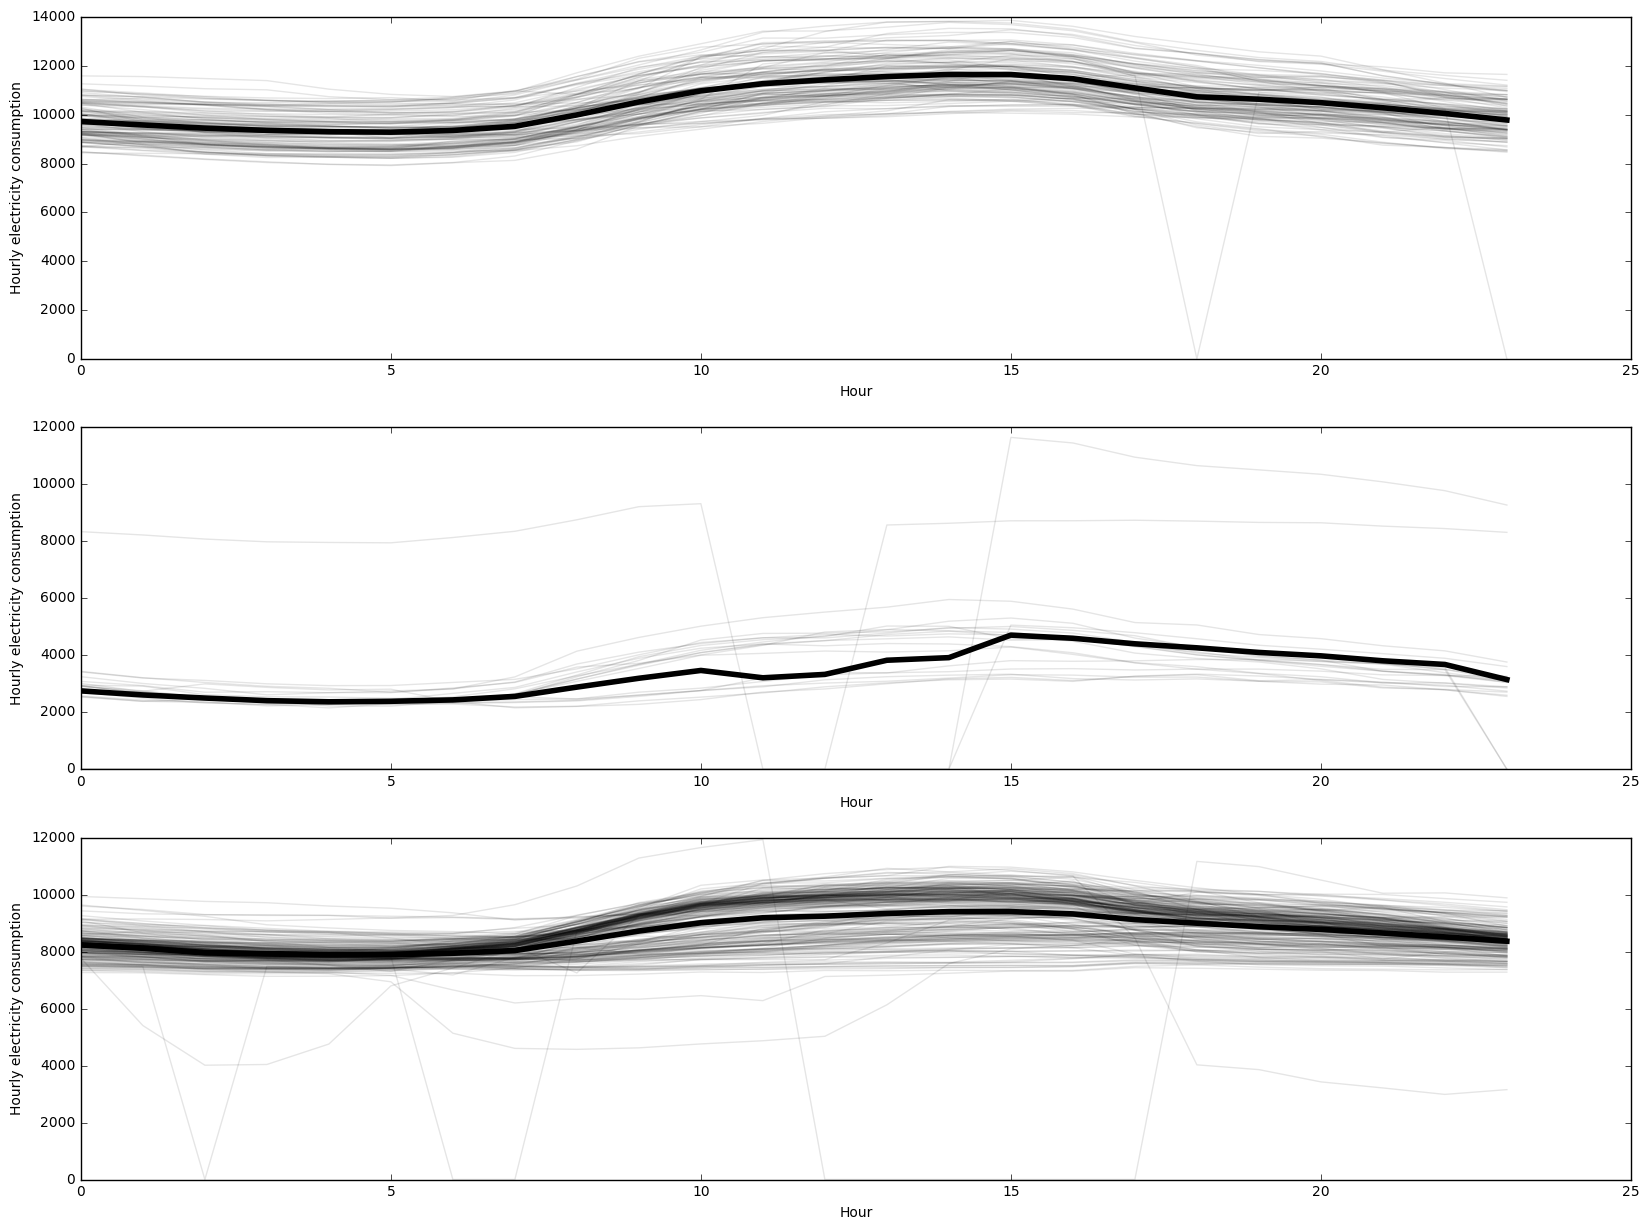

In [21]:
# Your code goes here...
# Using sklearn

plt.figure(1,figsize=(20,5*len(kmeans.cluster_centers_)))
for i in range(len(kmeans.cluster_centers_)):
    plt.subplot(len(kmeans.cluster_centers_),1,i+1)
    plt.plot(kmeans.cluster_centers_[i],linewidth=4, color='k')
    plt.xlabel('Hour')
    plt.ylabel('Hourly electricity consumption')
    for j in range(len(skClusters[i])):
        plt.plot(skClusters[i].iloc[j], alpha=0.1, color='k')
plt.show()

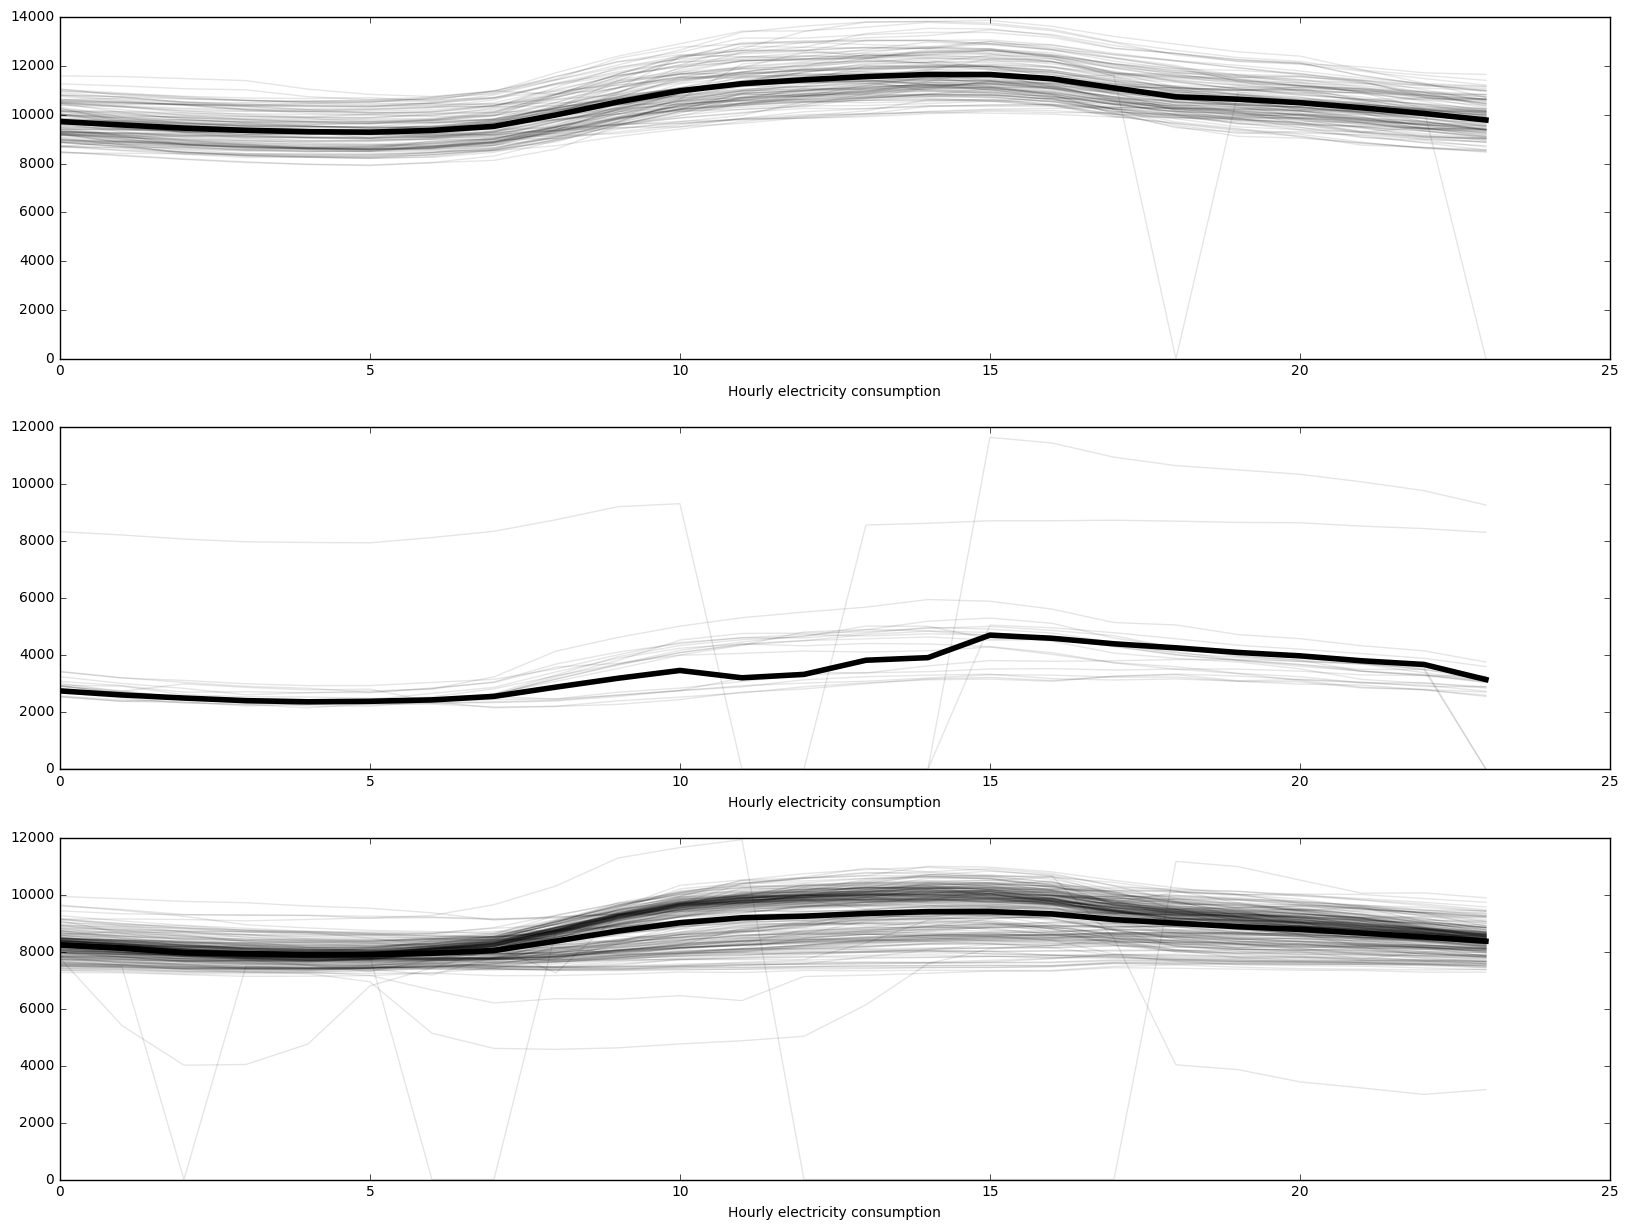

In [22]:
# Develope Clustering function by myself
plt.figure(1,figsize=(20,5*len(mu)))
for i in range(len(mu)):
    plt.subplot(len(mu),1,i+1)
    plt.plot(mu[i],linewidth=4, color='k')
    plt.xlabel('Hour')
    plt.xlabel('Hourly electricity consumption')
    for j in range(len(clusters[i])):
        plt.plot(clusters[i][j], alpha=0.1, color='k')
plt.show()